# Щербинин Андрей РТ5-61Б РК1 Вариант 22

**Задание №3**
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
**Датасет:** Admission_Predict_Ver1.1.csv
**Описание колонок**
1. GRE Scores ( out of 340 ) - Баллы по GRE ( из 340 )
2. TOEFL Scores ( out of 120 ) - Баллы TOEFL ( из 120 )
3. University Rating ( out of 5 ) - Рейтинг университета ( из 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) - Заявление о целях и cила рекомендательного письма ( из 5 )
5. Undergraduate GPA ( out of 10 ) - Средний балл бакалавриата ( из 10 )
6. Research Experience ( either 0 or 1 ) - Исследовательский опыт ( 0 или 1 )
7. Chance of Admit ( ranging from 0 to 1 ) - Вероятность поступления ( варьируется от 0 до 1 )

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


*Отмасштабируем столбец GRE Score в диапазон [0;1], преобразуя набранные очки в процентный диапазон*

In [3]:
from sklearn.preprocessing import MinMaxScaler
df_scalled = df.copy()
sc = MinMaxScaler()

df_scalled['GRE Score'] = sc.fit_transform(df_scalled[['GRE Score']])

df_scalled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,118,4,4.5,4.5,9.65,1,0.92
1,2,0.68,107,4,4.0,4.5,8.87,1,0.76
2,3,0.52,104,3,3.0,3.5,8.00,1,0.72
3,4,0.64,110,3,3.5,2.5,8.67,1,0.80
4,5,0.48,103,2,2.0,3.0,8.21,0,0.65


*Создадим категориальный признак CGPA_level который будет иметь значения High, Medium, Low*

In [6]:
# Разбиваем на 3 категории по диапазону
df['CGPA_level'] = pd.cut(df['CGPA'], bins=3, labels=['Low', 'Medium', 'High'])
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Medium


*Закодируем полученную категорию, используя Label Encoder*

In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

df_encoded['CGPA_level'] = le.fit_transform(df['CGPA_level'])

df_encoded.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,2
2,3,316,104,3,3.0,3.5,8.00,1,0.72,2
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2
4,5,314,103,2,2.0,3.0,8.21,0,0.65,2


*Закодируем полученную категорию, используя One Hot Encoder*

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Создаём и применяем OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  # Убираем sparse, чтобы сразу получить массив
ohe_array = ohe.fit_transform(df[['CGPA_level']])

# Получаем имена новых колонок
ohe_columns = ohe.get_feature_names_out(['CGPA_level'])

# Создаём DataFrame из one-hot массива
df_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=df.index)

# Объединяем с оригинальным df
df_combined = pd.concat([df, df_ohe], axis=1)

df_combined.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_level,CGPA_level_High,CGPA_level_Low,CGPA_level_Medium
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High,1.0,0.0,0.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium,0.0,0.0,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium,0.0,0.0,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium,0.0,0.0,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Medium,0.0,0.0,1.0


*Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".*

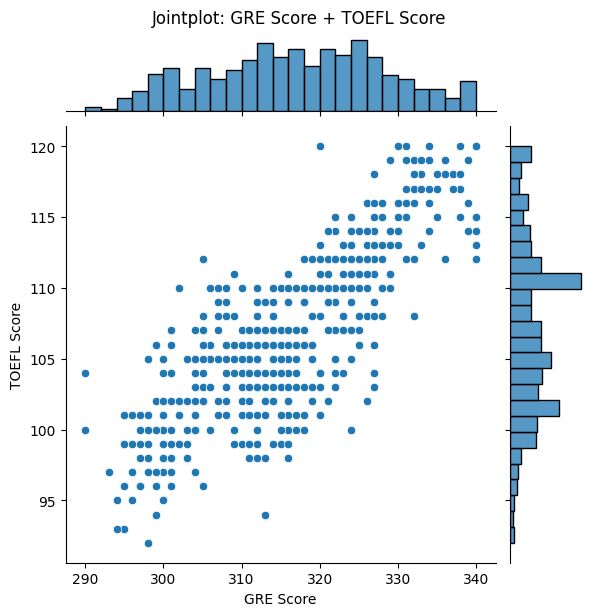

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 'GRE Score'
y = 'TOEFL Score'

sns.jointplot(
    x=x,
    y=y,
    data=df,
    kind='scatter',
    height=6,
    marginal_kws=dict(bins=25, fill=True)
)
plt.suptitle(f'Jointplot: {x} + {y}', y=1.02)
plt.show()